# 1. Data Cleaning

In [784]:
import pandas as pd

In [785]:
df_raw = pd.read_excel('Wine Sales Predictions_ Student Copy.xlsx',sheet_name='Initial Data')
df_raw

,sales,nps,marketing_spend,products,week,quarter
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151
1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151
4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151
...,...,...,...,...,...,...
243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193
244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193
245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193
246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193


In [786]:
df = df_raw
df = df.assign(Date=pd.to_datetime(df.week))
df = df.assign(Year = df.Date.dt.year)
df = df.assign(Quarter = df.Date.dt.quarter)
df = df.assign(Month = df.Date.dt.month)
df = df.assign(Day = df.Date.dt.day)
df = df.assign(Weekday = df.Date.dt.weekday)

# df = df.drop('week',axis=1)
# df.Quarter=df.Quarter.astype('object')
# pd.concat([df, pd.get_dummies(df.Quarter,prefix='Quarter')],axis=1).drop('Quarter')

In [787]:
df = df.assign(wine_1_yn = lambda x:x.products.str.contains('1') )
df = df.assign(wine_2_yn = lambda x:x.products.str.contains('2') )
df = df.assign(wine_3_yn = lambda x:x.products.str.contains('3') )

In [788]:
# df = df.drop('products',axis=1)
df = df.assign(wine_1_yn = lambda x:x.wine_1_yn.astype('int') )
df = df.assign(wine_2_yn = lambda x:x.wine_2_yn.astype('int') )
df = df.assign(wine_3_yn = lambda x:x.wine_3_yn.astype('int') )
df

,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151,2015-01-04,2015,1,1,4,6,0,1,0
1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151,2015-01-11,2015,1,1,11,6,0,1,0
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151,2015-01-18,2015,1,1,18,6,0,1,0
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151,2015-01-25,2015,1,1,25,6,0,1,0
4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151,2015-02-01,2015,1,2,1,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193,2019-09-01,2019,3,9,1,6,0,0,1
244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193,2019-09-08,2019,3,9,8,6,0,0,1
245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193,2019-09-15,2019,3,9,15,6,0,0,1
246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193,2019-09-22,2019,3,9,22,6,0,0,1


## Visualize nps (wine, trend over time, ..)

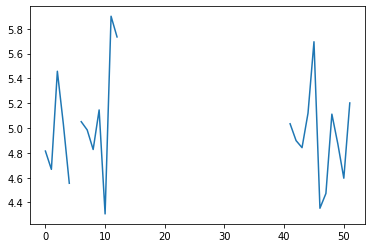

In [822]:
# plt.figure(figsize=(16,10))
plt.plot(df[(df.wine_1_yn==0)&(df.wine_2_yn!=0)&(df.wine_3_yn==0)].sort_values('Date').nps)

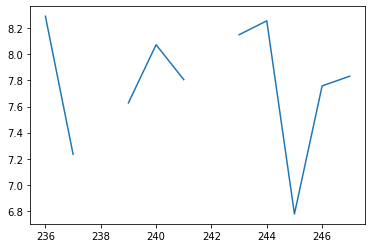

In [823]:
plt.plot(df[(df.wine_1_yn==0)&(df.wine_2_yn==0)&(df.wine_3_yn!=0)].sort_values('Date').nps)

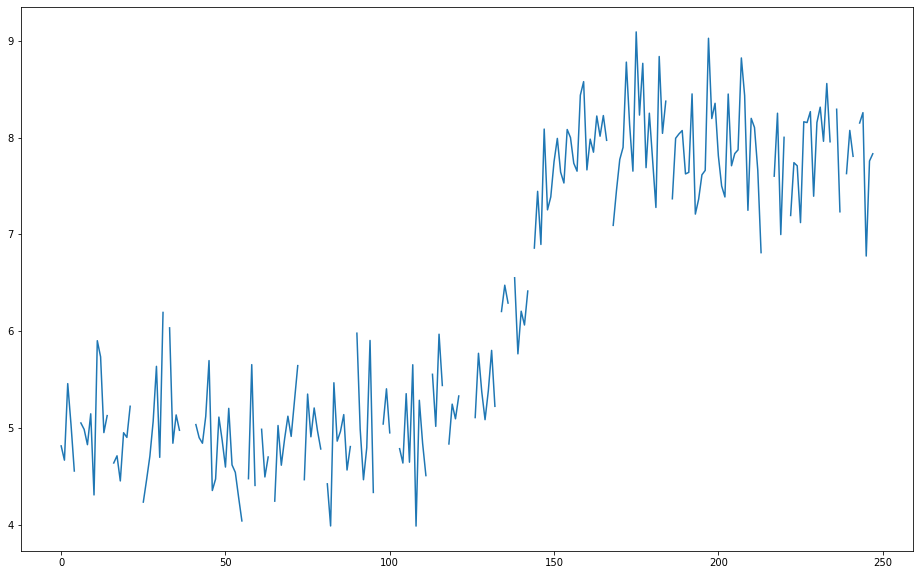

In [824]:
# for all wines, nps trend over time
plt.figure(figsize=(16,10))
plt.plot(df.sort_values('Date').nps)

## Decide to divide nps into 3 stages and do imputation accordingly

In [792]:
df[df.nps.isna() == True]

,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn
5,1040.398887,NaN,442.307692,wine 2,2015-02-08,20151,2015-02-08,2015,1,2,8,6,0,1,0
15,3492.578079,NaN,127.846154,"wine 1,wine 3",2015-04-19,20152,2015-04-19,2015,2,4,19,6,1,0,1
22,3807.826189,NaN,127.846154,"wine 1,wine 3",2015-06-07,20152,2015-06-07,2015,2,6,7,6,1,0,1
24,4185.158702,NaN,127.846154,"wine 1,wine 3",2015-06-21,20152,2015-06-21,2015,2,6,21,6,1,0,1
32,2931.185087,NaN,162.846154,"wine 2,wine 3",2015-08-16,20153,2015-08-16,2015,3,8,16,6,0,1,1
37,2100.132032,NaN,162.846154,"wine 2,wine 3",2015-09-20,20153,2015-09-20,2015,3,9,20,6,0,1,1
39,1804.176835,NaN,298.076923,wine 2,2015-10-04,20154,2015-10-04,2015,4,10,4,6,0,1,0
40,1597.420461,NaN,298.076923,wine 2,2015-10-11,20154,2015-10-11,2015,4,10,11,6,0,1,0
56,2658.403304,NaN,384.153846,"wine 2,wine 1,wine 3",2016-01-31,20161,2016-01-31,2016,1,1,31,6,1,1,1
60,2648.981189,NaN,384.153846,"wine 2,wine 1,wine 3",2016-02-28,20161,2016-02-28,2016,1,2,28,6,1,1,1


In [793]:
df[0:121].dropna().nps.mean()

4.949363000563023

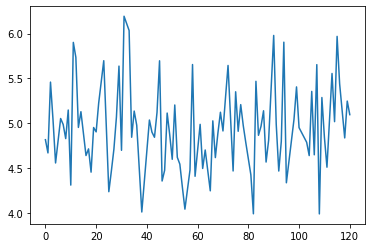

In [794]:
plt.plot(df[0:121].dropna().nps)

In [795]:
df[157:].dropna().nps.mean()

7.935035124470038

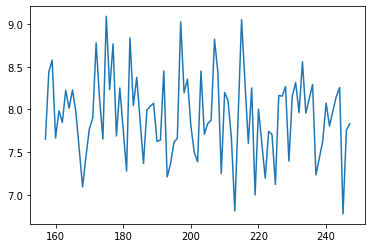

In [796]:
plt.plot(df[157:].dropna().nps)

In [797]:
(df.loc[157].nps-df.loc[121].nps)/(57-21)

0.06452370148201027

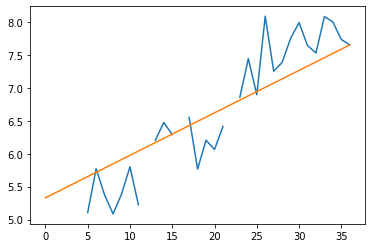

In [798]:
df_mid_nps_impute = pd.DataFrame(df_mid_nps)
df_mid_nps_impute = df_mid_nps_impute.reset_index()
df_mid_nps_impute = df_mid_nps_impute.assign(impute = lambda x: x.index*(df.loc[157].nps-df.loc[121].nps)/(157-121)+df.loc[121].nps)
plt.plot(df_mid_nps_impute.nps)
plt.plot(df_mid_nps_impute.impute)

In [799]:
df_mid_nps_impute.head()

,index,nps,impute
0,121,5.330242,5.330242
1,122,NaN,5.394765
2,123,NaN,5.459289
3,124,6.156250,5.523813
4,125,NaN,5.588336


In [800]:
df_imputed = df.reset_index()
df_imputed = df_imputed.assign(nps_imputed=0)
df_imputed['nps_imputed'][0:121] = df[0:121].dropna().nps.mean()
df_imputed['nps_imputed'][121:157] = df_mid_nps_impute.impute[0:36]
df_imputed['nps_imputed'][157:] = df[157:].dropna().nps.mean()
df_imputed


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn,nps_imputed
0,0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151,2015-01-04,2015,1,1,4,6,0,1,0,4.949363
1,1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151,2015-01-11,2015,1,1,11,6,0,1,0,4.949363
2,2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151,2015-01-18,2015,1,1,18,6,0,1,0,4.949363
3,3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151,2015-01-25,2015,1,1,25,6,0,1,0,4.949363
4,4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151,2015-02-01,2015,1,2,1,6,0,1,0,4.949363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193,2019-09-01,2019,3,9,1,6,0,0,1,7.935035
244,244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193,2019-09-08,2019,3,9,8,6,0,0,1,7.935035
245,245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193,2019-09-15,2019,3,9,15,6,0,0,1,7.935035
246,246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193,2019-09-22,2019,3,9,22,6,0,0,1,7.935035


In [801]:
for i in range(df_imputed.shape[0]):
    if not df_imputed.nps[i]>0:
        df_imputed.nps[i] = df_imputed.nps_imputed[i]
df_imputed

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn,nps_imputed
0,0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151,2015-01-04,2015,1,1,4,6,0,1,0,4.949363
1,1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151,2015-01-11,2015,1,1,11,6,0,1,0,4.949363
2,2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151,2015-01-18,2015,1,1,18,6,0,1,0,4.949363
3,3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151,2015-01-25,2015,1,1,25,6,0,1,0,4.949363
4,4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151,2015-02-01,2015,1,2,1,6,0,1,0,4.949363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193,2019-09-01,2019,3,9,1,6,0,0,1,7.935035
244,244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193,2019-09-08,2019,3,9,8,6,0,0,1,7.935035
245,245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193,2019-09-15,2019,3,9,15,6,0,0,1,7.935035
246,246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193,2019-09-22,2019,3,9,22,6,0,0,1,7.935035


## Finalize the imputation for nps

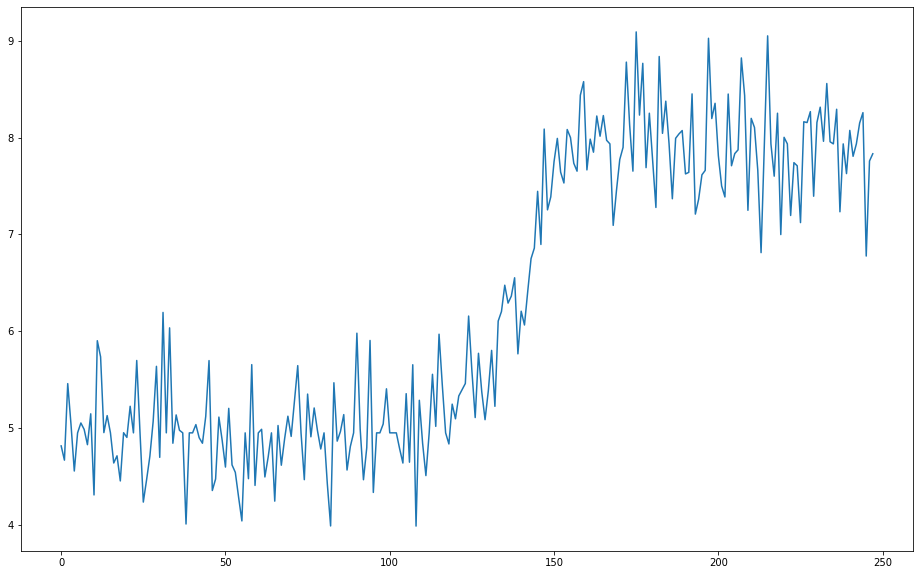

In [802]:
# for all wines
plt.figure(figsize=(16,10))
plt.plot(df_imputed.sort_values('Date').nps)

In [803]:
# def imputer(df):
#     col = 'index'
#     if df[col] <= 121:
#         return df[0:121].dropna().nps.mean()
#     elif df[col]>=157:
#         return df[157:].dropna().nps.mean()
#     else:
#         return df.col*(df.loc[157].nps-df.loc[121].nps)/(157-121)+df.loc[121].nps

In [804]:
# df_imputed = df.reset_index()
# df_imputed.assign(imputer = lambda x: x[0:121].dropna().nps.mean() if x['index'] <= 121 else (x[157:].dropna().nps.mean() if x['index'] >= 157 else x['index']*(x.loc[157].nps-x.loc[121].nps)/(157-121)+x.loc[121].nps))


In [805]:
df_imputed

,index,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn,nps_imputed
0,0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151,2015-01-04,2015,1,1,4,6,0,1,0,4.949363
1,1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151,2015-01-11,2015,1,1,11,6,0,1,0,4.949363
2,2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151,2015-01-18,2015,1,1,18,6,0,1,0,4.949363
3,3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151,2015-01-25,2015,1,1,25,6,0,1,0,4.949363
4,4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151,2015-02-01,2015,1,2,1,6,0,1,0,4.949363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193,2019-09-01,2019,3,9,1,6,0,0,1,7.935035
244,244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193,2019-09-08,2019,3,9,8,6,0,0,1,7.935035
245,245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193,2019-09-15,2019,3,9,15,6,0,0,1,7.935035
246,246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193,2019-09-22,2019,3,9,22,6,0,0,1,7.935035


# 2. Aggregation

In [826]:
df_imputed

,index,sales,nps,marketing_spend,products,week,quarter,Date,Year,Quarter,Month,Day,Weekday,wine_1_yn,wine_2_yn,wine_3_yn,nps_imputed
0,0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151,2015-01-04,2015,1,1,4,6,0,1,0,4.949363
1,1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151,2015-01-11,2015,1,1,11,6,0,1,0,4.949363
2,2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151,2015-01-18,2015,1,1,18,6,0,1,0,4.949363
3,3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151,2015-01-25,2015,1,1,25,6,0,1,0,4.949363
4,4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151,2015-02-01,2015,1,2,1,6,0,1,0,4.949363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,2917.459368,8.150907,233.692308,wine 3,2019-09-01,20193,2019-09-01,2019,3,9,1,6,0,0,1,7.935035
244,244,3218.197977,8.257735,233.692308,wine 3,2019-09-08,20193,2019-09-08,2019,3,9,8,6,0,0,1,7.935035
245,245,2846.655197,6.776199,233.692308,wine 3,2019-09-15,20193,2019-09-15,2019,3,9,15,6,0,0,1,7.935035
246,246,3292.316290,7.758401,233.692308,wine 3,2019-09-22,20193,2019-09-22,2019,3,9,22,6,0,0,1,7.935035


In [828]:
df_aggregated = df_imputed.groupby('quarter').agg('mean')[['sales','nps','marketing_spend','Year','Quarter','wine_1_yn','wine_2_yn','wine_3_yn']]
df_aggregated['sales'] = df_imputed.groupby('quarter').agg('sum')['sales']
df_aggregated

,sales,nps,marketing_spend,Year,Quarter,wine_1_yn,wine_2_yn,wine_3_yn
quarter,,,,,,,,
20151,13330.705641,5.033340,442.307692,2015.0,1.0,0,1,0
20152,46020.615247,4.902975,127.846154,2015.0,2.0,1,0,1
20153,35934.289542,5.050940,162.846154,2015.0,3.0,0,1,1
20154,28126.518837,4.930732,298.076923,2015.0,4.0,0,1,0
20161,35363.910423,4.695952,384.153846,2016.0,1.0,1,1,1
20162,44155.345357,4.970273,37.384615,2016.0,2.0,1,0,1
20163,34925.163488,4.911490,21.384615,2016.0,3.0,0,1,1
20164,36365.445280,4.958817,394.846154,2016.0,4.0,1,1,1
20171,30555.427137,5.064585,65.230769,2017.0,1.0,1,1,0


# 3. Linear regression

In [829]:
total = df_aggregated.copy()

In [830]:
total = total.assign(wine12 = lambda x: x.wine_1_yn*x.wine_2_yn)
total = total.assign(wine23 = lambda x: x.wine_2_yn*x.wine_3_yn)
total = total.assign(wine13 = lambda x: x.wine_1_yn*x.wine_3_yn)
total = total.assign(wine123 = lambda x: x.wine_1_yn*x.wine_2_yn*x.wine_3_yn)
total = total.assign(marketing_spend_shift = lambda x: x.marketing_spend.shift())

In [831]:
# total = df_imputed[['sales','nps','marketing_spend','Year',
#                     'Quarter',
# #                     'Month',
#                     'wine_1_yn','wine_2_yn','wine_3_yn']]

train = total[total.Year<2019]
train.dropna()
test = total[total.Year==2019]

In [837]:
formula = 'np.log(sales)~nps+marketing_spend_shift+wine_1_yn+wine_3_yn+wine13+C(Quarter)'
model = ols(formula, train).fit()
pd.concat([pd.DataFrame(np.exp(model.predict(test))).reset_index().rename({0:'Prediction'},axis=1),pd.DataFrame(test.sales).reset_index()],axis=1)
# pd.DataFrame(test.sales).reset_index()
# comparison = pd.concat([pd.DataFrame(model.predict(test)).reset_index().drop('index',axis=1),pd.DataFrame(test.sales).reset_index().drop('index',axis=1)],axis=1)
# comparison
# plt.plot(comparison[0])
# plt.plot(comparison.sales)
# plt.show()

,quarter,Prediction,quarter,sales
0,20191,37855.282869,20191,39984.820967
1,20192,48229.520421,20192,49520.594388
2,20193,43811.893055,20193,45108.909971


In [838]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(sales)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     47.83
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           7.10e-05
Time:                        02:45:58   Log-Likelihood:                 35.724
No. Observations:                  15   AIC:                            -53.45
Df Residuals:                       6   BIC:                            -47.08
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.8515      0.065    152.173      0.000       9.693      10.010
C(Quarter)[T.2.0]         0.2171      0.032      6.708      0.001       0.138       0.296
C(Quarter)[T.3.0]         0.2172      0.045      4.807      0.003       0.107       0.328
C(Quarter)[T.4.0]         0.1844      0.040      4.572      0.004       0.086       0.283
nps                       0.0289      0.009      3.380      0.015       0.008       0.050
marketing_spend_shift     0.0004      0.000      4.007      0.007       0.000       0.001
wine_1_yn                 0.1695      0.060      2.837      0.030       0.023       0.316
wine_3_yn                 0.2288      0.081      2.842      0.030       0.032       0.426
wine13                   -0.0638      0.083     -0.769      0.471      -0.267       0.139
==============================================================================
Omnibus:                        0.208   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.040
Skew:                           0.066   Prob(JB):                        0.980
Kurtosis:                       2.784   Cond. No.                     4.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

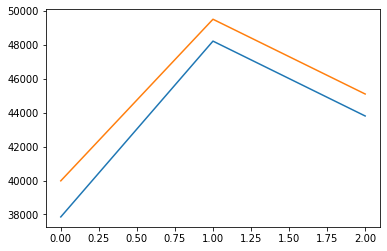

In [839]:
comparison = pd.concat([pd.DataFrame(np.exp(model.predict(test))).reset_index(),pd.DataFrame(test.sales).reset_index()],axis=1)
comparison
plt.plot(comparison[0])
plt.plot(comparison.sales)
plt.show()

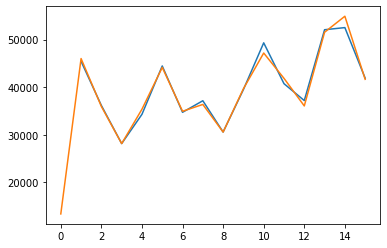

In [840]:
comparison_train = pd.concat([pd.DataFrame(np.exp(model.predict(train))).reset_index(),pd.DataFrame(train.sales).reset_index()],axis=1)
comparison_train
plt.plot(comparison_train[0])
plt.plot(comparison_train.sales)
plt.show()

In [817]:
test

,sales,nps,marketing_spend,Year,Quarter,wine_1_yn,wine_2_yn,wine_3_yn,wine12,wine23,wine13,wine123,marketing_spend_shift
quarter,,,,,,,,,,,,,
20191,39984.820967,7.825798,375.615385,2019.0,1.0,1,1,1,1,1,1,1,318.846154
20192,49520.594388,7.899775,405.076923,2019.0,2.0,1,0,1,0,0,1,0,375.615385
20193,45108.909971,7.816699,233.692308,2019.0,3.0,0,0,1,0,0,0,0,405.076923


In [843]:
test_new = test.iloc[0:1].reset_index().drop('quarter',axis=1)
test_new = test_new.drop('sales',axis=1)
test_new.marketing_spend = None
test_new.marketing_spend_shift = 233.692307
test_new.wine_3_yn = 0
test_new.wine23=0
test_new.wine13=0
test_new.wine123=0
test_new.Quarter = 4
test_new

,nps,marketing_spend,Year,Quarter,wine_1_yn,wine_2_yn,wine_3_yn,wine12,wine23,wine13,wine123,marketing_spend_shift
0,7.825798,None,2019.0,4,1,1,0,1,0,0,0,233.692307


In [844]:
np.exp(model.predict(test_new))

0    37287.565906
dtype: float64

# Lasso regression

In [270]:
#import modules
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.regression import linear_model

import matplotlib.pyplot as plt

from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [559]:
total = df_imputed[['sales','nps','marketing_spend','Year',
                    'Quarter',
#                     'Month',
                    'wine_1_yn','wine_2_yn','wine_3_yn']]

In [560]:
train = total[total.Year<2019]
test = total[total.Year==2019]

In [561]:
train = train.assign(sales_log = np.log(train.sales))
test = test.assign(sales_log = np.log(test.sales))

In [577]:
train_y = train.sales_log
train_X = train.drop(['sales','Year','sales_log'],axis=1)
test_y = test.sales_log
test_X = test.drop(['sales','Year','sales_log'],axis=1)

In [576]:
# formula = 'sales~nps+marketing_spend+wine_1_yn+wine_2_yn+wine_3_yn+Year+Quarter'
# model = ols(formula, train).fit()
# model.predict(test)
model = Lasso(alpha = 0.056)
model.fit(train_X, train_y)
model.predict(test_X)

array([8.01870537, 8.08131912, 8.07508546, 8.0459429 , 7.98988681,
       8.06394207, 8.13750646, 8.06394207, 8.04196106, 8.08482006,
       8.002192  , 8.06841183, 8.06394207, 8.00240823, 8.03836714,
       8.03624454, 7.99755571, 8.06621621, 8.06567423, 8.07311467,
       8.0155152 , 8.06574513, 8.07615455, 8.05291948, 8.09226002,
       8.05259902, 8.08431462, 8.10789959, 8.03809013, 8.08431462,
       8.06408503, 8.09349681, 8.07585511, 8.08431462, 8.09854154,
       8.10558192, 8.00794233, 8.07267366, 8.0775947 ])

In [564]:
# pd.DataFrame(model.predict(test_X)).rename({0:'prediction'},axis=1)

In [565]:
# pd.DataFrame(test_y).reset_index().drop('index',axis=1)

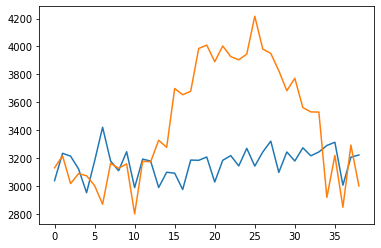

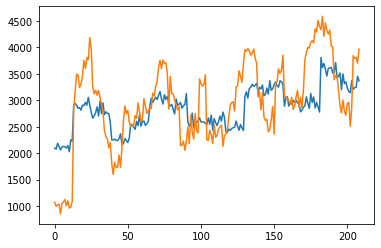

In [575]:
comparison = pd.concat([pd.DataFrame(np.exp(model.predict(test_X))).reset_index().drop('index',axis=1),pd.DataFrame(np.exp(test_y)).reset_index().drop('index',axis=1)],axis=1)
plt.plot(comparison[0])
plt.plot(comparison.sales_log)
plt.show()

comparison_train = pd.concat([pd.DataFrame(np.exp(model.predict(train_X))).reset_index().drop('index',axis=1),pd.DataFrame(np.exp(train_y)).reset_index().drop('index',axis=1)],axis=1)
plt.plot(comparison_train[0])
plt.plot(comparison_train.sales_log)
plt.show()

In [567]:
def RMSPE(Prediction, Actual):
    return (np.mean(((Prediction-Actual)/Actual)**2))**0.5
def RMSE(Prediction,Actual):
    return (np.mean((Prediction-Actual)**2))**0.5

In [568]:
# RMSPE(model.predict(test),test.sales)
RMSPE(model.predict(train_X),train_y)

0.0345914295430014

In [569]:
# RMSE(model.predict(test),test.sales)
RMSE(model.predict(train_X),train_y)

0.2561430307768822

In [572]:
array_alpha = np.linspace(0,2,501)
array_RMSPE = np.array([])
def RMSPEOFALPHA(alpha):
    model = Lasso(alpha = alpha)
    model.fit(train_X, train_y)
    model.predict(test_X)
    return RMSPE(np.exp(model.predict(test_X)),np.exp(test_y))

for alpha in array_alpha:
    result = RMSPEOFALPHA(alpha)
    array_RMSPE = np.append(array_RMSPE,result)
pd.DataFrame(array_RMSPE,array_alpha)[0].idxmin()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.977322131255743, tolerance: 0.0023658813290586326
  positive)


0.056

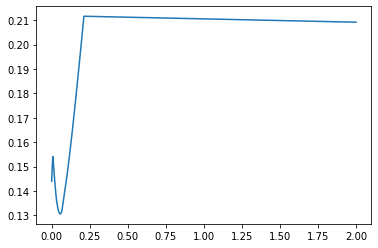

In [573]:
plt.plot(pd.DataFrame(array_RMSPE,array_alpha))

In [574]:
model = Lasso(alpha = 0.056)
model.fit(train_X, train_y)
model.predict(test_X)
RMSPE(np.exp(model.predict(test_X)),np.exp(test_y))

0.1306235838059618

In [452]:
test_X

,nps,marketing_spend,Quarter,wine_1_yn,wine_2_yn,wine_1_yn,sales_log
209,7.248636,375.615385,1,1,1,1,8.048567
210,8.198706,375.615385,1,1,1,1,8.075715
211,8.104119,375.615385,1,1,1,1,8.011752
212,7.661925,375.615385,1,1,1,1,8.035208
213,6.811357,375.615385,1,1,1,1,8.030213
214,7.935035,375.615385,1,1,1,1,8.007096
215,9.051265,375.615385,1,1,1,1,7.961528
216,7.935035,375.615385,1,1,1,1,8.058988
217,7.601506,375.615385,1,1,1,1,8.047510
218,8.251828,375.615385,1,1,1,1,8.057559


In [196]:
# xl2930
# mjt2199@columbia.edu
# mdg2197@columbia.edu